In [1]:
%%capture
import struct 
import numpy as np
from matplotlib import pyplot as plt

from helpers import read_echogram


In [2]:
def test_overlay_wb_echo(filename, channels=None, depthline=True):
    # Load sounding data and echogram.
    data, echo = read_echogram(filename, channels)
    #print("echogram read")

    ## Calculate sampling rate, using assumption that y-axis is in depth (ft)
    ## - not actually used in this function but given here as an illustration.
    # time1 = np.array([i["time1"] for i in data])
    # dz = time1[1:] - time1[:-1]
    if depthline:
        ## Calculate the water depth in y-axis samples
        wb = np.array([i["water_depth"] for i in data])
        lower_limit = np.array([i["lower_limit"] for i in data])
        wb_s =  wb * echo.shape[0] / lower_limit

    fig, axes = plt.subplots()
    axes.imshow(echo, aspect='auto')
    if depthline:
        axes.plot([i["frame_index"] for i in data],
                    wb_s, linewidth=2, color="red")
    fig.show()

  0%|          | 0.00/27.7M [00:00<?, ?B/s]

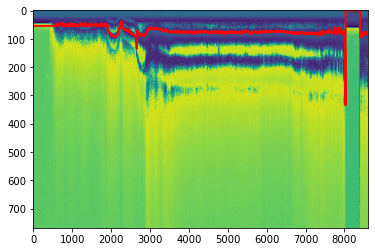

In [3]:
test_overlay_wb_echo('./sample-data-lowrance/HDS5/southern1.sl2')

  0%|          | 0.00/12.9M [00:00<?, ?B/s]

packetsize: 3072 920


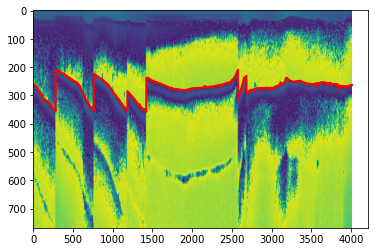

In [4]:
test_overlay_wb_echo('./sample-data-lowrance/Elite_4_Chirp/small.sl2')

  0%|          | 0.00/26.5M [00:00<?, ?B/s]

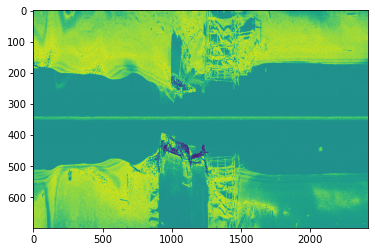

In [5]:
test_overlay_wb_echo('./sample-data-lowrance/other/sonar-log-api-testdata.sl3', channels=[5], depthline=False)